In [2]:
import pandas as pd
import os 
output_path = os.getcwd()+"/analysis_output"
path_data = pd.read_excel(output_path+'/statistical_analysis_results_with_labels_pathway.xlsx',index_col = 0)
ortho_data = pd.read_excel(output_path+'/statistical_analysis_results_with_labels_Orthology.xlsx',index_col = 0)

In [3]:
# Remove rows with NaN values in the relevant columns for plotting
data = path_data.dropna(subset=['log2FC_value', 'Wilcoxon_p_value(-log10)'])
data2 = ortho_data.dropna(subset = ['log2FC_value', 'Wilcoxon_p_value(-log10)'])

In [4]:
top_5_max = data.nlargest(5, 'log2FC_value')
top_5_min = data.nsmallest(5, 'log2FC_value')

In [5]:
top_5_max

,KEGG_no,pathway_kegg_no,Control_mean,Cancer_mean,FC_value,Wilcoxon_p,log2FC_value,LogReg_p_univ,LogReg_p_fdr,Wilcoxon_p_value(-log10)
442,ko04970,Salivary secretion,1.684613e-10,0.000077,455867.535086,2.493491e-98,18.798255,NaN,NaN,97.603192
200,ko00592,alpha-Linolenic acid metabolism,4.243859e-10,0.000151,356346.273969,1.360042e-96,18.442920,NaN,NaN,95.866448
112,ko00943,Isoflavonoid biosynthesis,3.125000e-11,0.000011,348056.312422,4.283637e-101,18.408961,0.262255,0.000287,100.368187
371,ko04137,Mitophagy - animal,5.291513e-10,0.000072,136345.109040,1.885192e-97,17.056903,NaN,NaN,96.724644
176,ko04122,Sulfur relay system,8.337185e-08,0.002340,28072.133344,1.598677e-46,14.776851,NaN,NaN,45.796239


In [6]:
top_5_min

,KEGG_no,pathway_kegg_no,Control_mean,Cancer_mean,FC_value,Wilcoxon_p,log2FC_value,LogReg_p_univ,LogReg_p_fdr,Wilcoxon_p_value(-log10)
203,ko00402,Benzoxazinoid biosynthesis,0.001594,2.268577e-10,1.423332e-07,2.328067e-46,-22.744225,0.987254,3.010001e-12,45.633004
115,ko00403,Indole diterpene alkaloid biosynthesis,0.005584,8.264976e-10,1.480218e-07,2.392139e-46,-22.687687,0.804619,2.966224e-04,45.621214
374,ko05310,Asthma,0.000067,3.265060e-09,4.907203e-05,2.456738e-46,-14.314739,0.617277,1.563399e-01,45.609641
120,ko04640,Hematopoietic cell lineage,0.161612,2.654107e-05,1.642267e-04,7.011407e-46,-12.572023,0.807979,4.911985e-01,45.154195
242,ko05414,Dilated cardiomyopathy (DCM),0.067786,3.708131e-05,5.470387e-04,7.011407e-46,-10.836069,0.677827,3.562931e-01,45.154195


In [7]:
fold_change_threshold = 1.0  # threshold for log2 fold change
significance_threshold = 1.3  # threshold for -log10(p-value) (~p < 0.05)
logistic_threshold = 0.05  # threshold for logistic Regression with false discovery rate adjusted p-value


/tmp/ipykernel_16433/2477671015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = 'grey'


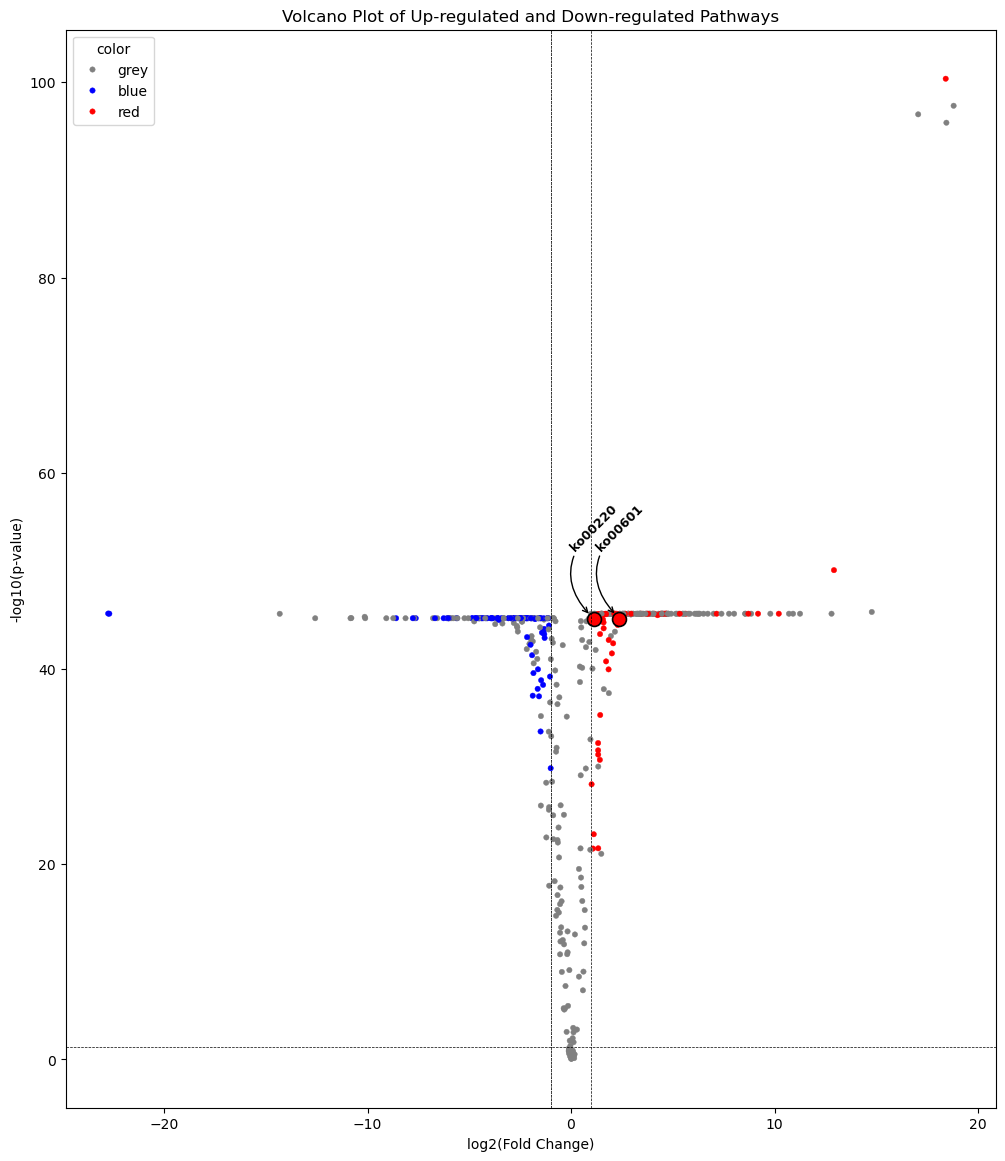

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color based on conditions
data['color'] = 'grey'
data.loc[(data['log2FC_value'] > fold_change_threshold) & 
         (data['Wilcoxon_p_value(-log10)'] > significance_threshold) &
         (data['LogReg_p_fdr'] < logistic_threshold), 'color'] = 'red'
data.loc[(data['log2FC_value'] < -fold_change_threshold) & 
         (data['Wilcoxon_p_value(-log10)'] > significance_threshold) &
         (data['LogReg_p_fdr'] < logistic_threshold),
         'color'] = 'blue'

# Create the plot
plt.figure(figsize=(12, 14))
sns.scatterplot(
    x='log2FC_value', 
    y='Wilcoxon_p_value(-log10)', 
    data=data, 
    hue='color', 
    palette={'grey': 'grey', 'red': 'red', 'blue': 'blue'}, 
    edgecolor=None,
    legend=True,
    s=15  # Dot size
)

# Add horizontal and vertical lines for thresholds
plt.axhline(y=significance_threshold, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=fold_change_threshold, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=-fold_change_threshold, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=-1, color='black', linestyle=':', linewidth=0.5)  # Additional threshold line for downregulated pathways
for idx, (x, y, label) in enumerate(zip(data['log2FC_value'], data['Wilcoxon_p_value(-log10)'], data['KEGG_no'])):
    if label in ['ko00220', 'ko00601']:  # Specify which KEGG numbers to label
        plt.scatter([x], [y], color = 'red', edgecolors = 'black', linewidth = 1.2, s = 100)
        plt.annotate(
            label,
            xy=(x,y),  # Point to the data
            xytext=(x,y + 7),  # Position label above
            fontsize=9,
            fontweight="bold",  # Make font bold,
            ha='center',
            rotation = 45,
            arrowprops=dict(arrowstyle="->", color='black', linewidth=1,connectionstyle = 'arc3,rad = 0.5',
                            shrinkA = 0.1, shrinkB =5)
        )

# Labeling the plot
plt.title("Volcano Plot of Up-regulated and Down-regulated Pathways")
plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")

# Show plot
plt.show()


/tmp/ipykernel_16433/3617098859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['color'] = 'grey'


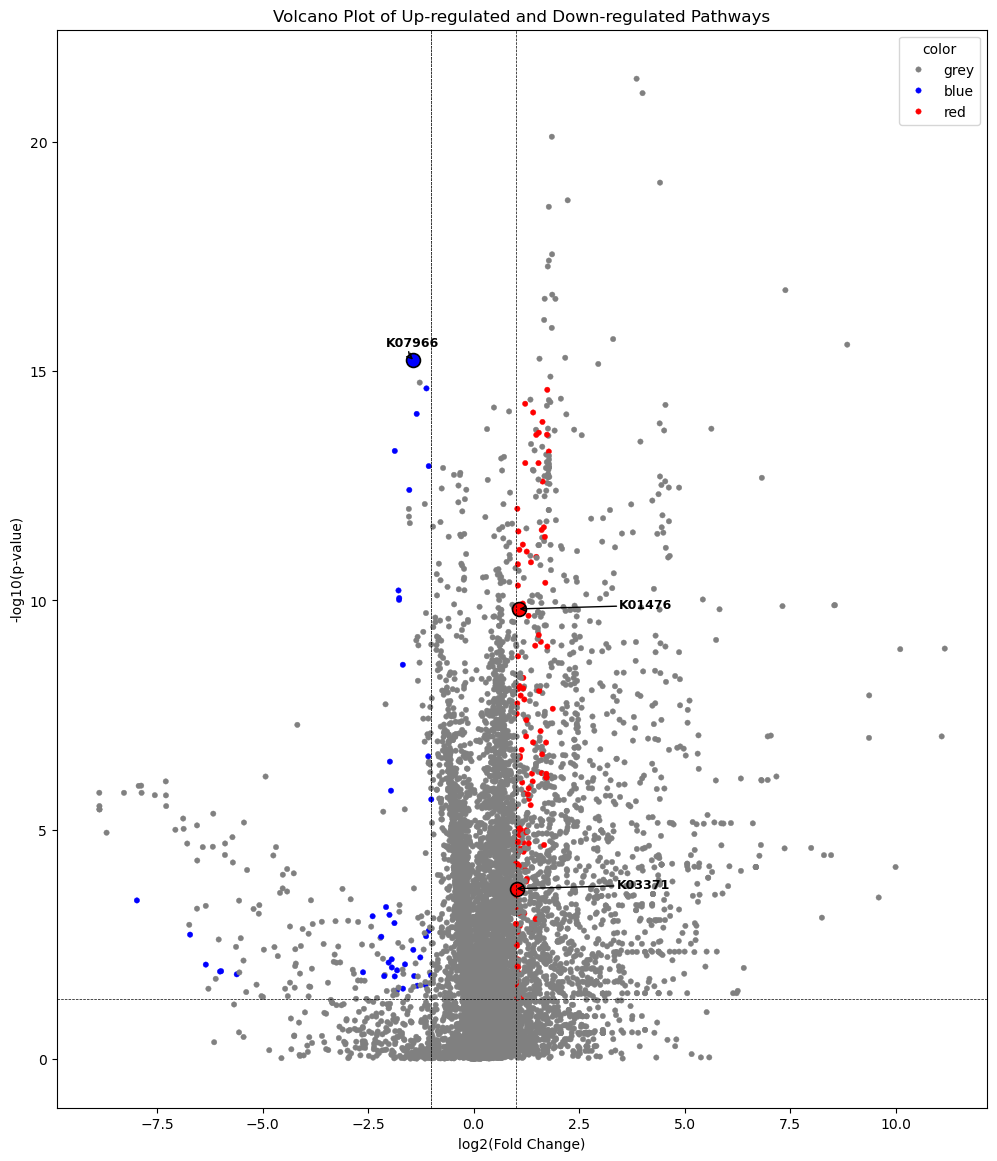

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color based on conditions
data2['color'] = 'grey'
data2.loc[(data2['log2FC_value'] > fold_change_threshold) & 
         (data2['Wilcoxon_p_value(-log10)'] > significance_threshold) &
         (data2['LogReg_p_fdr'] < logistic_threshold), 'color'] = 'red'
data2.loc[(data2['log2FC_value'] < -fold_change_threshold) & 
         (data2['Wilcoxon_p_value(-log10)'] > significance_threshold) &
         (data2['LogReg_p_fdr'] < logistic_threshold),
         'color'] = 'blue'
# Create the plot
plt.figure(figsize=(12, 14))
sns.scatterplot(
    x='log2FC_value', 
    y='Wilcoxon_p_value(-log10)', 
    data=data2, 
    hue='color', 
    palette={'grey': 'grey', 'red': 'red', 'blue': 'blue'}, 
    edgecolor=None,
    legend=True,
    s=15  # Dot size
)

# Add horizontal and vertical lines for thresholds
plt.axhline(y=significance_threshold, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=fold_change_threshold, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=-fold_change_threshold, color='black', linestyle='--', linewidth=0.5)
plt.axvline(x=-1, color='black', linestyle=':', linewidth=0.5)  # Additional threshold line for downregulated pathways

# Annotate specific points
for idx, (x, y, label) in enumerate(zip(data2['log2FC_value'], data2['Wilcoxon_p_value(-log10)'], data2['KEGG_no'])):
    if label in ['K03371', 'K01476']:  # Specify KEGG numbers to label in red
        plt.scatter([x], [y], color='red', edgecolors='black', linewidth=1.2, s=100)
        plt.annotate(
            label,
            xy=(x, y),  # Point to the data point
            xytext=(x + 3, y),  # Position label to the right
            fontsize=9,
            fontweight="bold",  # Make font bold,
            ha='center',
            arrowprops=dict(
                arrowstyle="->", 
                color='black', 
                linewidth=1,
                shrinkA=0, 
                shrinkB=0
            )
        )

    elif label in ['K07966']:  # Specify KEGG number to label in blue
        plt.scatter([x], [y], color='blue', edgecolors='black', linewidth=1.2, s=100)
        plt.annotate(
            label,
            xy=(x, y),
            xytext=(x, y+0.3),
            fontsize=9,
            fontweight="bold",  # Make font bold,
            ha='center',
            arrowprops=dict(
                arrowstyle="->", 
                color='black', 
                linewidth=1, 
                connectionstyle="arc3,rad=0.5",  # Smooth curved arrow
                shrinkA=0,
                shrinkB=0
            )
        )

# Labeling the plot
plt.title("Volcano Plot of Up-regulated and Down-regulated Pathways")
plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")

# Show plot
plt.show()
